In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [55]:
df = pd.read_csv('Ready for Model.csv')

### Train-Test-Split

In [56]:
x = df.drop('real_price', axis=1)
y = df[['real_price']]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3)

In [58]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(51355, 23) (51355, 1)
(12839, 23) (12839, 1)


In [59]:
##statmodel method which gives more info
import statsmodels.api as sm
X_constant = sm.add_constant(X_train) ##add the intercept, this is optional
lr = sm.OLS(y_train, X_constant).fit()
lr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             real_price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 1.542e+04
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        21:11:51   Log-Likelihood:                 37597.
No. Observations:               51355   AIC:                        -7.515e+04
Df Residuals:                   51331   BIC:                        -7.493e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.6627      0.006   2254.740      0.000      12.652      12.674
floor_area_sqm              0.1997      0.002    108.464      0.000       0.196       0.203
remaining_lease             0.1262      0.001    155.108      0.000       0.125       0.128
school_dist                 0.0087      0.001     15.161      0.000       0.008       0.010
num_school_2km              0.0145      0.001     15.344      0.000       0.013       0.016
hawker_dist                -0.0649      0.001    -59.683      0.000      -0.067      -0.063
num_hawker_2km              0.0067      0.001      6.425      0.000       0.005       0.009
mrt_dist                   -0.0331      0.001    -53.352      0.000      -0.034      -0.032
num_mrt_2km                -0.0045      0.001     -3.957      0.000      -0.007      -0.002
supermarket_dist           -0.0112      0.001    -20.030      0.000      -0.012      -0.010
num_supermarket_2km        -0.0229      0.001    -27.926      0.000      -0.025      -0.021
dist_central               -0.1193      0.002    -68.061      0.000      -0.123      -0.116
flat_type                   0.0571      0.002     26.565      0.000       0.053       0.061
storey_range                0.0246      0.000     82.512      0.000       0.024       0.025
region_Central              0.1359      0.004     32.234      0.000       0.128       0.144
region_East                 0.0972      0.003     37.657      0.000       0.092       0.102
region_North East           0.0279      0.003      9.043      0.000       0.022       0.034
region_West                 0.0481      0.002     24.013      0.000       0.044       0.052
model_Apartment            -0.0100      0.003     -3.335      0.001      -0.016      -0.004
model_Maisonette            0.0411      0.003     12.338      0.000       0.035       0.048
model_Model A               0.0314      0.002     19.385      0.000       0.028       0.035
model_New Generation        0.0630      0.002     30.983      0.000       0.059       0.067
model_Premium Apartment     0.0332      0.002     15.525      0.000       0.029       0.037
model_Special               0.1709      0.004     42.476      0.000       0.163       0.179
==============================================================================
Omnibus:                     3499.425   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7149.481
Skew:                           0.470   Prob(JB):                         0.00
Kurtosis:                       4.568   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#create instance of influence
influence = lr.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

In [40]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print('Coefficients:', model.coef_)
print('\n')
print('Intercept: ', model.intercept_)
print('\n')
print('Mean Squared Error: %0.3f ' %mean_squared_error(y_test, predictions))
print('Test data R^2 score: %0.3f' %model.score(X_test, y_test))
print('Train data R^2 score: %0.3f' %model.score(X_train, y_train))
print('\n') 
adjusted_r2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Test data Adjusted R^2 score: %0.3f' %adjusted_r2)

Coefficients: [[ 0.19970139  0.12618463  0.00867373  0.0144533  -0.06488168  0.00670116
  -0.03312074 -0.0045287  -0.01120115 -0.02294252 -0.1192684   0.05711928
   0.0246334   0.13594464  0.09722974  0.02788497  0.04814254 -0.01003007
   0.04109029  0.03143517  0.06298505  0.03322956  0.17088654]]


Intercept:  [12.66265515]


Mean Squared Error: 0.013 
Test data R^2 score: 0.877
Train data R^2 score: 0.874


Test data Adjusted R^2 score: 0.876


The train data and test data r2 score is almost identical.(The test score is abit higher). This is a good sign. Shows that our model is not overfitting.

We also look at the Adjusted Test R2 score which takes into account the number of features added to the linear model. This is because the test R2 will always increase or stay the same when you add more features. 

Text(0, 0.5, 'Predictions')

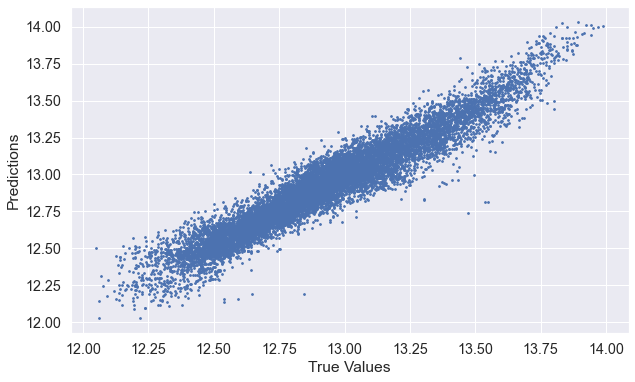

In [61]:
## Plot the accuracy of our predictions 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, s = 3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Cross Validation


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lm = linear_model.LinearRegression()
r2_scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5) ##cross val on entire dataset
print('r2 scores: ', r2_scores)
print('Mean r2 score is: ', sum(r2_scores)/5)

r2 scores:  [0.87442302 0.87138532 0.87251299 0.87280662 0.87588591]
Mean r2 score is:  0.8734027728301426


Cross validation is a provides a more reliable measure of out model's performance, as compared to the usual train-test-split.
Our mean r2 is 0.873, which is abit lower than the previous train-test-split r2 score of 0.877. 


#### Mean of Residuals Check

In [31]:
residuals = y_test - predictions 
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals real_price   -0.000388
dtype: float64


Mean of residuals is very close to zero. This is a good sign.

### Homosecdascity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

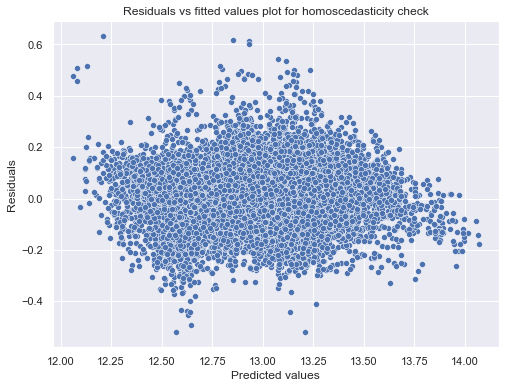

In [32]:
plt.figure(figsize=(8,6))
residuals = y_test - predictions 
sns.scatterplot(x=predictions.reshape(-1), y= residuals['real_price'].values)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Does not appear to have a definite pattern. 

#### Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [33]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.9694306541963157), ('p-value', 0.89277821747629)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject the null hypothesis that error terms are homoscedastic.

### Normality of Error Terms

In order for us to interpret our coefficients, we need to make sure that normaility of error terms is satisfied, since calculation of confidence intervals and feature significance is based on this assumption. We will use a QQ plot to check.

<AxesSubplot:ylabel='Density'>

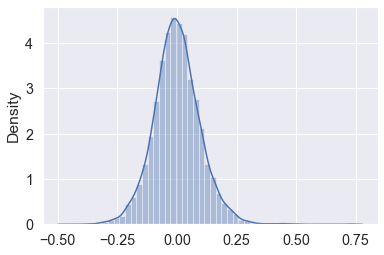

In [76]:
sns.distplot(residuals)

<AxesSubplot:ylabel='Density'>

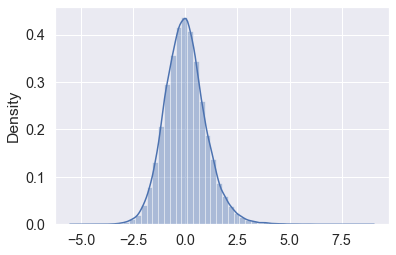

In [88]:
sns.distplot(standardized_residuals) ##obtained from the statmodel method 

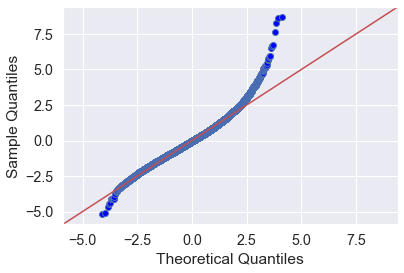

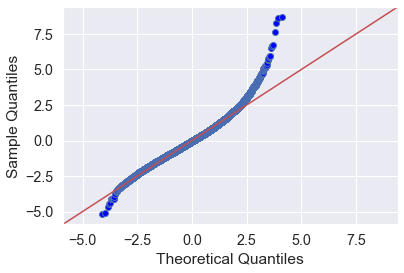

In [90]:
import statsmodels.api as sm
sm.qqplot(standardized_residuals, line='45')

In a Q-Q plot, the x-axis displays the theoretical quantiles. This means it doesn’t show your actual data, but instead it represents where your data would be if it were normally distributed.

The y-axis displays your actual data. This means that if the data values fall along a roughly straight line at a 45-degree angle, then the data is normally distributed.

The data shows that our model's error terms are not normally distributed at all. This is likely because many of our features have non-normal distributions. So we may not be able to trust our feature coefficients.

### Coefficient Analysis

In [34]:
coeff = list(model.coef_)
coefs = pd.DataFrame(
    data = coeff,
    columns = x.columns
)
coefs = coefs.transpose()
coefs.rename(columns={0: 'Coefficient'}, inplace =True)
coefs['Value'] = np.where(coefs['Coefficient']<0, 'Negative', 'Positive')
coefs['Abs_coefficient'] = coefs['Coefficient'].abs()
coefs.sort_values(by='Abs_coefficient', ascending = True, inplace = True)

In [35]:
coefs.sort_values(by='Abs_coefficient', ascending = False)

,Coefficient,Value,Abs_coefficient
floor_area_sqm,0.199701,Positive,0.199701
model_Special,0.170887,Positive,0.170887
region_Central,0.135945,Positive,0.135945
remaining_lease,0.126185,Positive,0.126185
dist_central,-0.119268,Negative,0.119268
region_East,0.097230,Positive,0.097230
hawker_dist,-0.064882,Negative,0.064882
model_New Generation,0.062985,Positive,0.062985
flat_type,0.057119,Positive,0.057119
region_West,0.048143,Positive,0.048143


In [37]:
coefs.to_csv('Linear model coefficients.csv')

Text(0.5, 1.0, 'Coefficients')

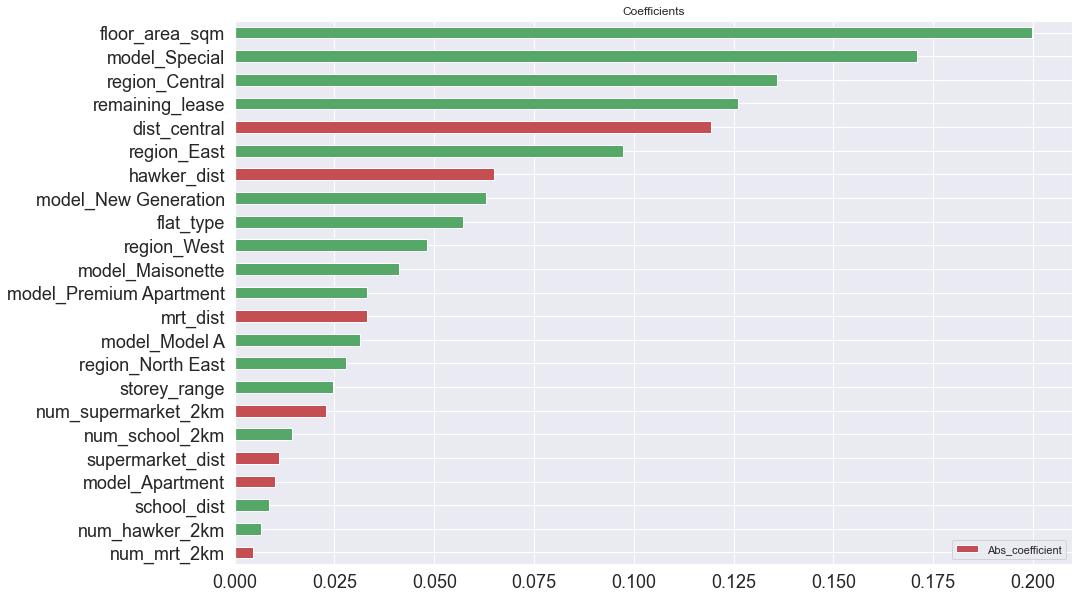

In [15]:
coefs.plot(kind='barh', y='Abs_coefficient', figsize=(15, 10), 
           color=(coefs['Value'] == 'Positive').map({True: 'g', False: 'r'}), fontsize = 18)
plt.title('Coefficients')

### Intepretations of Coefficients

#### Strong Coefficients

Floor_area_sqm has the highest coefficient value of 0.200(3sf). This means one standard deviation increase in FLoor_area_sqm will result in 0.2 standard deviation increase in the Resultant price.



### Conclusion

Our Linear Regression Model achieved a pretty good score on the test data. Train and Test data scores are very similar. Hence, the prediction is ok.

However, linear regression depends on a few key assumptions to work well, some of which have not been able to satisified here. 

Multicollinearity is still present amongst the features, which makes it hard to state their accuracy based on their coefficients. For example, number of hawkers within 2km is very correlated with distance to central, with a value of 0.75.  I did not drop any features as I wanted to study their impact on the model.





### Rerun

We can try to drop some of the multicollinear features, as well as less important features as determined by the feature coefficients, and run the model again.
- Num Supermarket 2km
- Num_schools 2km
- Supermarket dist
- school dist
- num_hawker_2km
- num_mrt_2km

By reducing number of features, we are reducing model complexity. We will see if test performance improves. 


In [41]:
df = pd.read_csv('Ready for Model_dropped.csv')

In [42]:
x = df.drop('real_price', axis=1)
y = df[['real_price']]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3)

In [44]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print('Coefficients:', model.coef_)
print('\n')
print('Intercept: ', model.intercept_)
print('\n')
print('Mean Squared Error: %0.3f ' %mean_squared_error(y_test, predictions))
print('Test data R^2 score: %0.3f' %model.score(X_test, y_test))
print('Train data R^2 score: %0.3f' %model.score(X_train, y_train))
print('\n') 
adjusted_r2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Test data Adjusted R^2 score: %0.3f' %adjusted_r2)

Coefficients: [[ 0.20329509  0.1267719  -0.06781384 -0.03202488 -0.10147848  0.05344891
   0.02460736  0.15914755  0.11360242  0.04981759  0.06090672 -0.00884363
   0.04144439  0.03199423  0.06103467  0.03442063  0.16686168]]


Intercept:  [12.65508408]


Mean Squared Error: 0.014 
Test data R^2 score: 0.874
Train data R^2 score: 0.870


Test data Adjusted R^2 score: 0.873


Previous results before dropping: 
- Test data R^2 score: 0.877
- Train data R^2 score: 0.874

Results after dropping:
- Test data R^2 score: 0.874
- Train data R^2 score: 0.870

Not much difference in the scores. Both test and train scores dropped very slightly. Guess more information is results in better accuracy.

Now that we dropped quite a few features, model interpretability should be improved, and we can trust the coefficeints to be more accurate now. 

Text(0.5, 1.0, 'Coefficients')

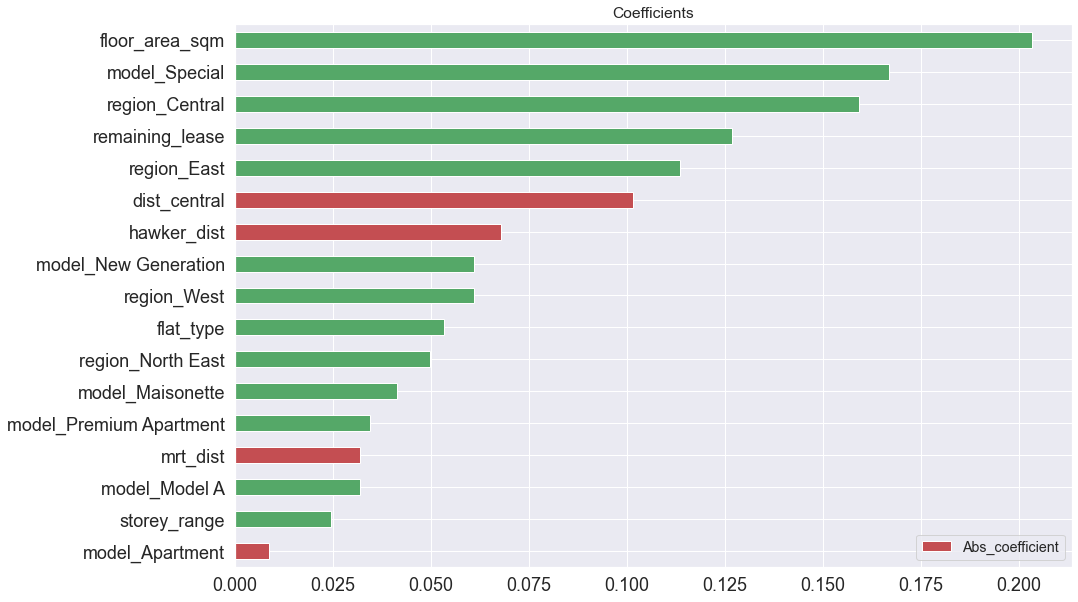

In [46]:
v

The coefficients are relatively the same, with some reshuffling of the order.

### Rerun with town Ungrouped
Previously we grouped the towns of Singapore into 5 main regions. Now we try to ungroup them and run the model.

In [49]:
df = pd.read_csv('Ready for Model_ungrouped.csv')

In [50]:
x = df.drop('real_price', axis=1)
y = df[['real_price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print('Intercept: ', model.intercept_)
print('\n')
print('Mean Squared Error: %0.3f ' %mean_squared_error(y_test, predictions))
print('Test data R^2 score: %0.3f' %model.score(X_test, y_test))
print('Train data R^2 score: %0.3f' %model.score(X_train, y_train))
print('\n') 
adjusted_r2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Test data Adjusted R^2 score: %0.3f' %adjusted_r2)

Coefficients: [[ 0.19607737  0.13359704  0.00753291  0.00437471 -0.06361744  0.0244981
  -0.05651962  0.0117717  -0.00198409 -0.0050135  -0.03718596  0.05771634
   0.02369997  0.1384729   0.08865047  0.30280988  0.02939803  0.21268186
  -0.00778713  0.43097339  0.14705223 -0.05261343  0.21255108  0.08352254
   0.03470748  0.07328178 -0.04077612  0.1449429   0.65618497  0.13733831
   0.00518961  0.26525263 -0.1322397  -0.09209548  0.19362604  0.10025316
   0.13795512 -0.12235546 -0.00200084  0.0371963   0.02667533  0.03425975
   0.03567815  0.1567559 ]]


Intercept:  [12.67988824]


Mean Squared Error: 0.009 
Test data R^2 score: 0.912
Train data R^2 score: 0.909


Test data Adjusted R^2 score: 0.912


Test score has increased quite significantly, from 0.877 to 0.912. Test data is higher than train data, so no overfitting. Guess it is better to ungroup the towns, instead of grouping into regions.

Text(0.5, 1.0, 'Coefficients')

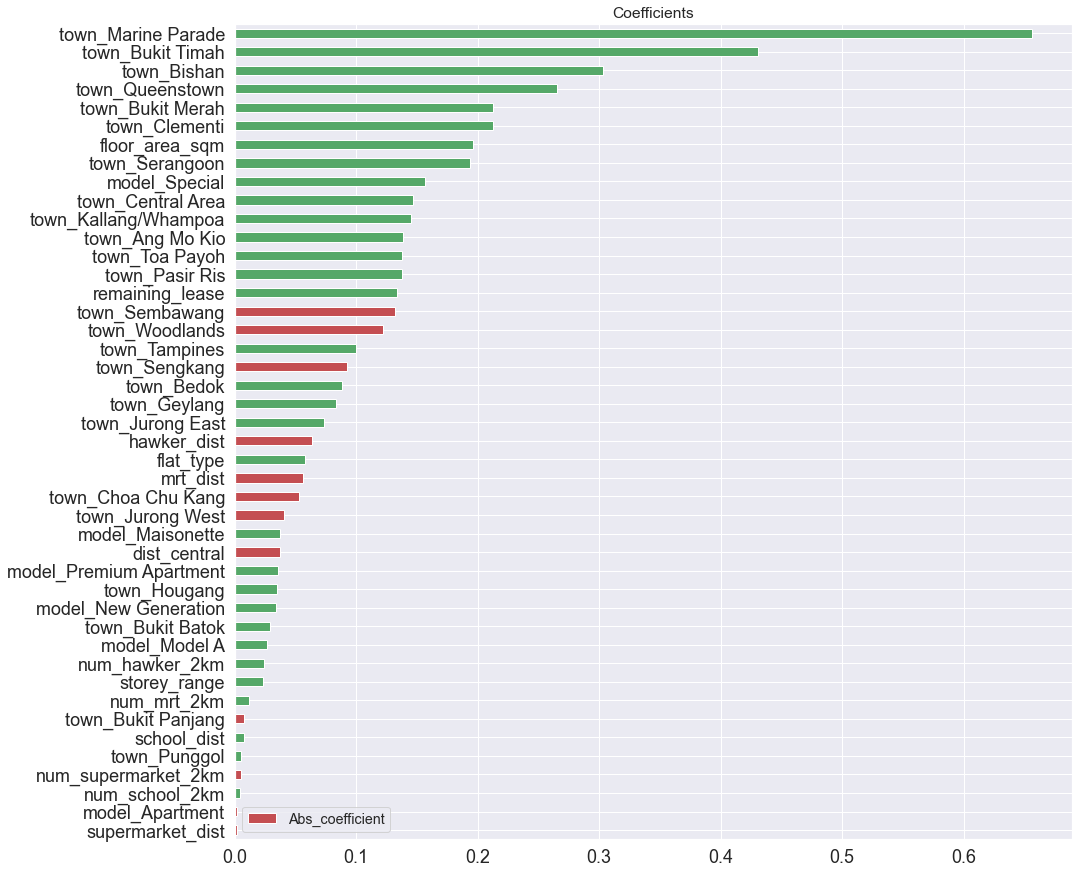

In [54]:
coeff = list(model.coef_)
coefs = pd.DataFrame(
    data = coeff,
    columns = x.columns
)
coefs = coefs.transpose()
coefs.rename(columns={0: 'Coefficient'}, inplace =True)
coefs['Value'] = np.where(coefs['Coefficient']<0, 'Negative', 'Positive')
coefs['Abs_coefficient'] = coefs['Coefficient'].abs()
coefs.sort_values(by='Abs_coefficient', ascending = True, inplace = True)

coefs.plot(kind='barh', y='Abs_coefficient', figsize=(15, 15), 
           color=(coefs['Value'] == 'Positive').map({True: 'g', False: 'r'}), fontsize = 18)
plt.title('Coefficients')

Although prediction has improved, our model interpretability may have deproved. There are so many features coefficients, mostly the towns. It is difficult to compare them to each other.

One thing that can be sure from this linear model is that the towns play the largest factor in determining price of the house.

#### Rerun the model without the added feature engineering
Rerun the model without the new features added based on each house coordinates. (dist to schools, hawker, central... everything).

The purpose of this experiment is to see whether adding any of these features had an impact on our linear model's prediction performance. We must look at adjusted R2 score

- num_mrt_2km
- num_hawker_2km
- Num Supermarket 2km
- Num_schools_2km
- Supermarket dist
- school dist
- hawker dist
- mrt dist
- dist central


In [6]:
df = pd.read_csv('Ready for Model_ungrouped.csv')
df.drop(['num_school_2km', 'num_mrt_2km', 'num_supermarket_2km', 'num_hawker_2km', 'school_dist', 'hawker_dist', 'mrt_dist',
         'supermarket_dist', 'dist_central'], axis = 1, inplace= True)

In [10]:
x = df.drop('real_price', axis=1)
y = df[['real_price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print('Mean Squared Error: %0.3f ' %mean_squared_error(y_test, predictions))
print('Test data R^2 score: %0.3f' %model.score(X_test, y_test))
print('Train data R^2 score: %0.3f' %model.score(X_train, y_train))
print('\n') 
adjusted_r2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Test data Adjusted R^2 score: %0.3f' %adjusted_r2)

Mean Squared Error: 0.013 
Test data R^2 score: 0.883
Train data R^2 score: 0.880


Test data Adjusted R^2 score: 0.883


Adjusted Test Data R2 dropped from 0.912 to 0.883. This confirms that our new features did have an improvement on the model's predictive performance.

### Conclusion 

Our model obtained the highest Test R2 score of 0.912. So it is pretty good at predicting house prices. However we can only use it to predict the price of a house within the 2017-2019 period. Housing prices fluctuate alot based on the year, even when taking CPI into account. 